# LSTM Stock Price Prediction

In [1]:
import nltk     
import pandas as pd    
from pandas import read_csv 
import matplotlib.pyplot as plt
from pylab import rcParams    
import tensorflow as tf
from tensorflow import keras
import csv    
from datetime import datetime, timedelta 
import urllib.parse
from matplotlib import rc
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
import os
import seaborn as sns
import yfinance as yf
import time
from pandas_datareader import data
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from pandas.plotting import register_matplotlib_converters

Using TensorFlow backend.


In [2]:
register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted',font_scale=1.5)
rcParams['figure.figsize'] = 22,10

## Data Frames

In [3]:
aapl = data.DataReader('AAPL',start='2012-01-05',end='2019-12-31',data_source='yahoo')
aapl.shape

(2010, 6)

In [4]:
#Preprocessing
aapl = aapl['Close'].values #convert to numpy array
aapl = aapl.reshape(-1,1) #reshape for keras to have 2 columns
print(aapl.shape)
aapl[:7]

(2010, 1)


array([[14.92964268],
       [15.08571434],
       [15.0617857 ],
       [15.11571407],
       [15.09107113],
       [15.04964256],
       [14.99321365]])

In [5]:
train = np.array(aapl[:int(aapl.shape[0]*0.8)]) #convert second value to intger
test = np.array(aapl[int(aapl.shape[0]*0.8)-50:])# to fit a step of 50 in lstm step
print(test.shape)
print(train.shape)
int(aapl.shape[0]*0.8)

(452, 1)
(1608, 1)


1608

In [6]:
scaler = MinMaxScaler(feature_range=(0,1)) # scale the data between 0 and 1
train = scaler.fit_transform(train) # train and transform the data
print(train[:7])

[[0.02926309]
 [0.03391327]
 [0.03320031]
 [0.03480712]
 [0.03407288]
 [0.03283851]
 [0.0311572 ]]


In [7]:
test = scaler.transform(test) #only use transform so that this is not untrained
print(test[:7])

[[0.91046563]
 [0.89020491]
 [0.889758  ]
 [0.86018629]
 [0.84216024]
 [0.81303544]
 [0.87135948]]


In [8]:
#using 50 enteries to predict the 1 entry
def create_my_dataset(df):
    x=[]
    y=[]
    for i in range(50,df.shape[0]):
        x.append(df[i-50:i,0])
        y.append(df[i,0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [9]:
x_train, y_train = create_my_dataset(train)
x_train[:1]

array([[0.02926309, 0.03391327, 0.03320031, 0.03480712, 0.03407288,
        0.03283851, 0.0311572 , 0.03636073, 0.04105348, 0.03960628,
        0.03167861, 0.03924447, 0.03179568, 0.05972864, 0.05756852,
        0.06038841, 0.06648576, 0.07017822, 0.06986963, 0.06873105,
        0.0735834 , 0.07814842, 0.08332004, 0.09167333, 0.10922054,
        0.10948656, 0.11925514, 0.12655493, 0.11400908, 0.11884012,
        0.11874436, 0.13229053, 0.13036445, 0.13392921, 0.14033518,
        0.14389999, 0.15416868, 0.16164935, 0.1638095 , 0.16456505,
        0.15177444, 0.14868847, 0.14914606, 0.16117056, 0.16455443,
        0.17182233, 0.18895451, 0.21181167, 0.20753392, 0.20754455]])

In [10]:
y_train[:1]

array([0.22407024])

In [11]:
import random
random.seed(130)
x_test, y_test = create_my_dataset(test)

#reshape the test and train to 3d arrays
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_test = np.reshape(x_test, (x_test.shape[0],x_train.shape[1],1))
print(x_train.shape)

(1558, 50, 1)


In [12]:
#tf.logging.set_verbosity(tf.logging.ERROR)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(units=120, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units=120,return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units=120))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=1))

In [13]:
model.compile(loss = 'mean_squared_error', optimizer='adam')

In [14]:
x_train.shape

(1558, 50, 1)

In [15]:
model.fit(x_train,y_train, epochs=40, batch_size=34)

Epoch 1/40
46/46 [==============================] - 8s 80ms/step - loss: 0.0352
Epoch 2/40
46/46 [==============================] - 4s 78ms/step - loss: 0.0022
Epoch 3/40
46/46 [==============================] - 4s 80ms/step - loss: 0.0023
Epoch 4/40
46/46 [==============================] - 4s 82ms/step - loss: 0.0025
Epoch 5/40
46/46 [==============================] - 5s 99ms/step - loss: 0.0020
Epoch 6/40
46/46 [==============================] - 4s 84ms/step - loss: 0.0019
Epoch 7/40
46/46 [==============================] - 4s 82ms/step - loss: 0.0020
Epoch 8/40
46/46 [==============================] - 4s 81ms/step - loss: 0.0020
Epoch 9/40
46/46 [==============================] - 4s 80ms/step - loss: 0.0017
Epoch 10/40
46/46 [==============================] - 4s 81ms/step - loss: 0.0018
Epoch 11/40
46/46 [==============================] - 4s 81ms/step - loss: 0.0015
Epoch 12/40
46/46 [==============================] - 4s 84ms/step - loss: 0.0019
Epoch 13/40
46/46 [==================

# Predictions

range(1608, 2010)


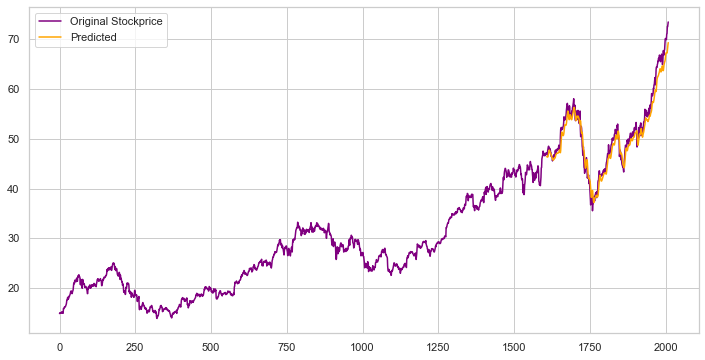

In [16]:
%matplotlib inline
pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted',font_scale=1.0)
rcParams['figure.figsize'] = 22,10

plt.subplots(figsize=(12,6))
plt.plot(aapl,color='purple', label = 'Original Stockprice')
plt.plot(range(len(y_train)+50, len(y_train)+ 50 +len(pred)), pred, color='orange', label='Predicted')
plt.legend()
print(range(len(y_train)+50, len(y_train)+50+len(pred)))

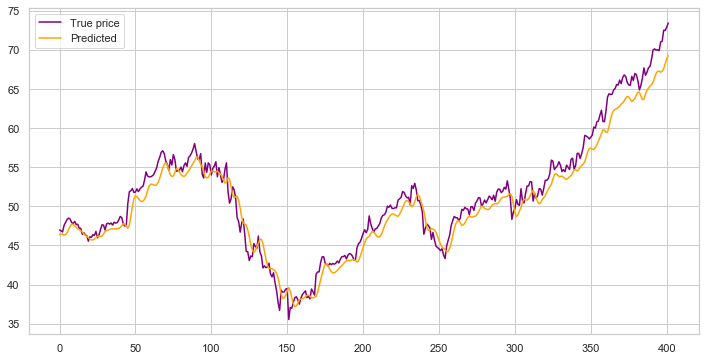

In [17]:
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1,1))

plt.subplots(figsize=(12,6))
plt.plot(y_test_scaled,color='purple', label = 'True price')
plt.plot(pred, color='orange',label='Predicted')
plt.legend()

In [18]:
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error, mean_absolute_error

In [19]:
rmse = mean_squared_error(y_test_scaled,pred)
rmse

2.9906882141631423

In [20]:
r2 = r2_score(y_test_scaled,pred)
r2

0.947938710197686

In [21]:
#from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test_scaled,pred)
mae

1.4129177586949286